Функции потерь и оптимизация

Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
Реализовать самостоятельно логистическую регрессию.

Обучить ее
- методом градиентного спуска
- методом nesterov momentum
- методом rmsprop
В качестве dataset’а взять Iris, оставив 2 класса:
Iris Versicolor
Iris Virginica


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
# data.target[[10, 25, 50]]

list(iris.target_names)
#['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# only 2 types, Iris Versicolor (1) and Iris Virginica (2)

df = df[df['class'] != 0]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['class'].values
X = df.drop('class', axis=1).values
model = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)


0.6121351626426308

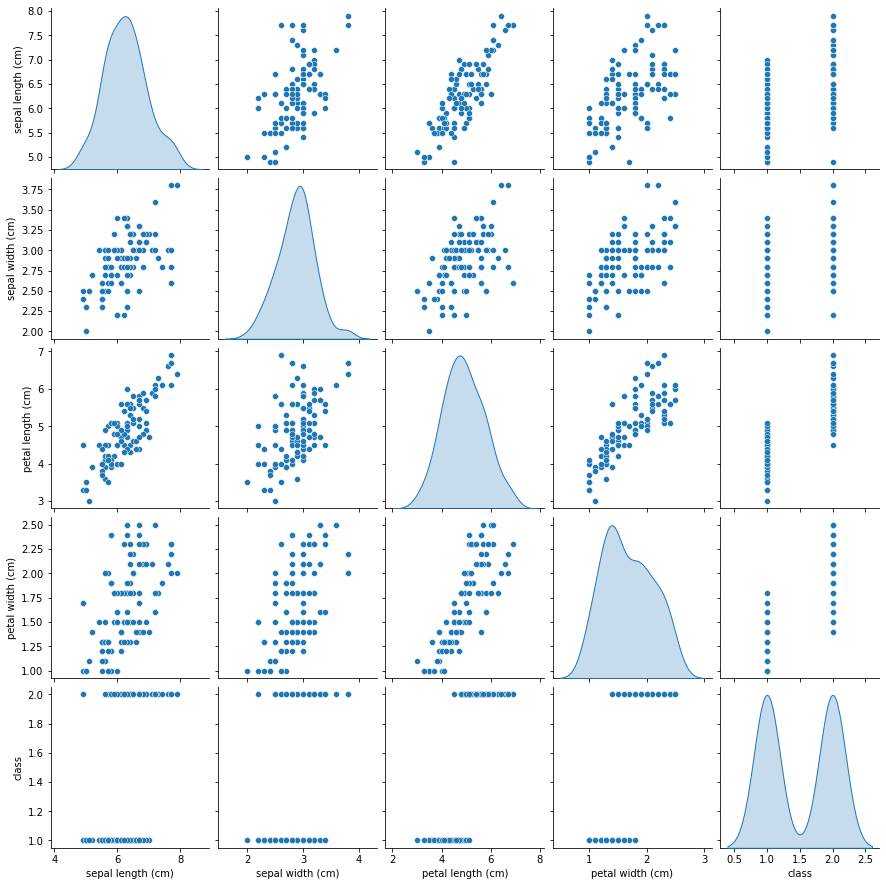

In [5]:
import seaborn as sns
sns.pairplot(df, diag_kind="kde")

C:\Users\asd\anaconda3\envs\scientificProject\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


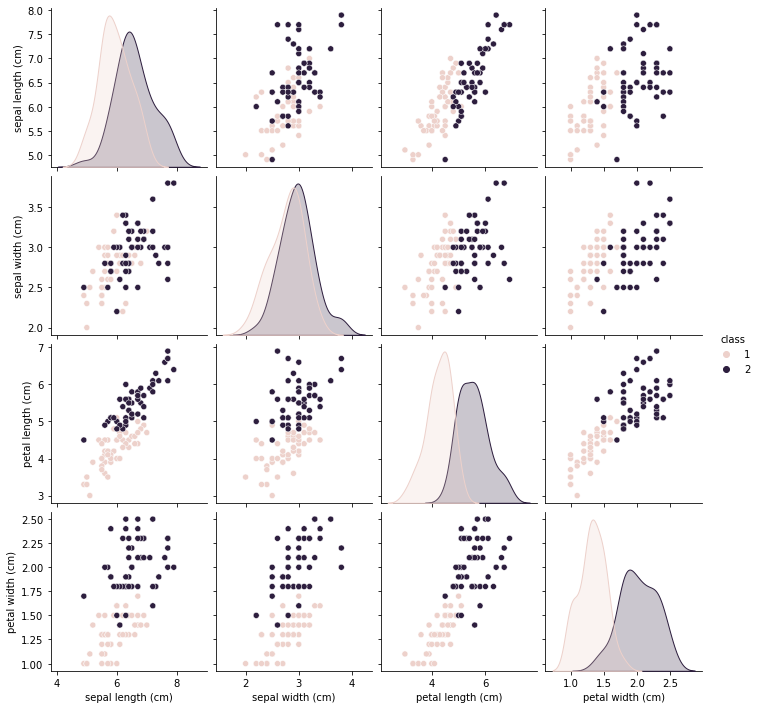

In [6]:
sns.pairplot(df, hue='class', size=2.5)


array([[<AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

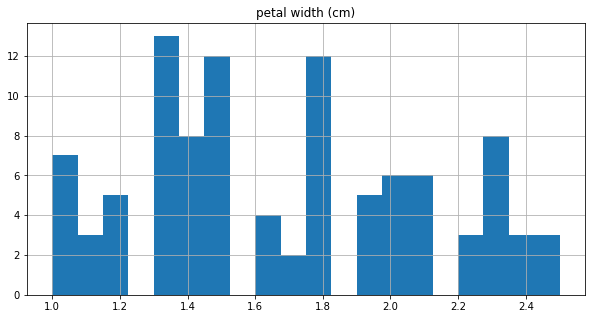

In [7]:
df.hist(column = 'petal width (cm)',bins=20, figsize=(10,5))

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

inp_df = df.drop(df.columns[[4]], axis=1)
out_df = df.drop(df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()
#
print('Input Shape', X_tr_arr.shape)
print('Output Shape', X_test.shape)

Input Shape (80, 4)
Output Shape (20, 4)


In [12]:

def weight_initialization(n_features, b=0):
    w = np.zeros((1, n_features))
    return w, b

def sigmoid_activation(result, gamma=None):
    return 1 / (1 + np.exp(-result))

def cost(features, target, shape):
    return (-1/shape)*(np.sum((target*np.log(features)) + ((1-target)*(np.log(1-features)))))

def simple(features, gamma=0.9, lr=0.25, target=None, shape=None):
    return np.sum(-1*(gamma*np.log(features) + lr))

def nesterov(features, gamma=0.9, lr=0.75, target=None, shape=None):
    return np.sum(-1*(gamma*np.log(features) + lr*np.log(features)))

def rms_prop(features, gamma=0.9, lr=0.25, eps=0.00001, target=None, shape=None):
    eg = gamma + (1-gamma)*np.log(features)*np.log(features)
    return np.sum(-1*(lr/np.sqrt(eg + eps) * np.log(features)))

def model_optimize(w, b, X, Y, opt=cost):
    m = X.shape[0]
    x_targets = X.T

    # activation
    result = np.dot(w, x_targets) + b
    final_result = sigmoid_activation(result)

    y_targets = Y.T
    cost_v = opt(final_result, target=y_targets, shape=m)

    # calculation
    dw = (1/m)*(np.dot(x_targets, (final_result-y_targets).T))
    db = (1/m)*(np.sum(final_result-y_targets))

    grads = {"dw": dw, "db": db}

    return grads, cost_v

def model_predict(w, b, X, Y, learning_rate, no_iterations, opt):
    costs = []
    for i in range(no_iterations):
        grads, cost_v = model_optimize(w, b, X, Y, opt)
        dw = grads["dw"]
        db = grads["db"]
        # weight update
        w = w - (learning_rate * dw.T)
        b = b - (learning_rate * db)

        if (i % 100 == 0):
            costs.append(cost_v)
            # print("Cost after {} iteration is {} {}".format(i, cost_v, type(cost_v)))

    print("Cost after {} iteration opt {} costs {}".format(no_iterations, opt.__name__, costs[-1]))

    # parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1, m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred


def accuracy(activation=sigmoid_activation, b=0, lr=0.0001, iterations=4500, opt=cost):
    from sklearn.metrics import accuracy_score
    # number of features
    n_features = X_tr_arr.shape[1]
    # print('Number of Features', n_features)

    w, b = weight_initialization(n_features, b)
    # gradient descent
    coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=lr, no_iterations=iterations, opt=opt)
    # prediction
    w = coeff["w"]
    b = coeff["b"]
    # print('Optimized weights', w)
    # print('Optimized intercept', b)

    final_train_pred = activation(np.dot(w,X_tr_arr.T)+b)
    final_test_pred = activation(np.dot(w,X_ts_arr.T)+b)

    m_tr =  X_tr_arr.shape[0]
    m_ts =  X_ts_arr.shape[0]

    y_tr_pred = predict(final_train_pred, m_tr)
    print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))

    y_ts_pred = predict(final_test_pred, m_ts)
    print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()


Cost after 5000 iteration opt cost costs -0.019684855598057237
Training Accuracy 0.325
Test Accuracy 0.3
Cost after 5000 iteration opt cost costs -0.1756645121267523
Training Accuracy 0.4
Test Accuracy 0.4
Cost after 5000 iteration opt cost costs -0.6807723437460376
Training Accuracy 0.475
Test Accuracy 0.6
Cost after 5000 iteration opt simple costs 14.82209864760781
Training Accuracy 0.325
Test Accuracy 0.3
Cost after 5000 iteration opt simple costs 10.298175753528655
Training Accuracy 0.4
Test Accuracy 0.4
Cost after 5000 iteration opt simple costs -2.043076530268138
Training Accuracy 0.475
Test Accuracy 0.6
Cost after 5000 iteration opt nesterov costs 63.84051418728099
Training Accuracy 0.325
Test Accuracy 0.3
Cost after 5000 iteration opt nesterov costs 55.54665554813586
Training Accuracy 0.4
Test Accuracy 0.4
Cost after 5000 iteration opt nesterov costs 32.92102636117508
Training Accuracy 0.475
Test Accuracy 0.6
Cost after 5000 iteration opt rms_prop costs 9.996190103507267
Traini

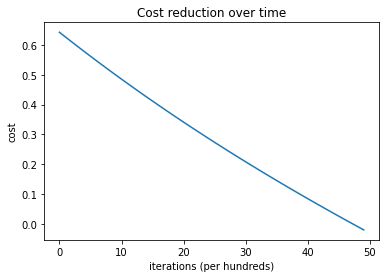

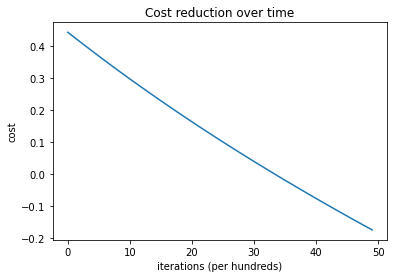

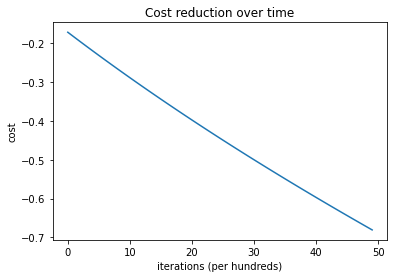

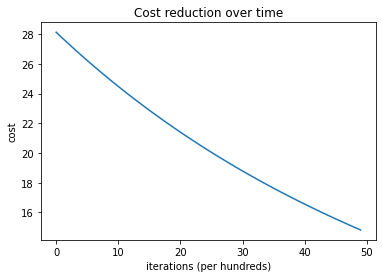

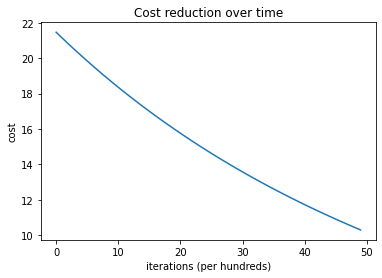

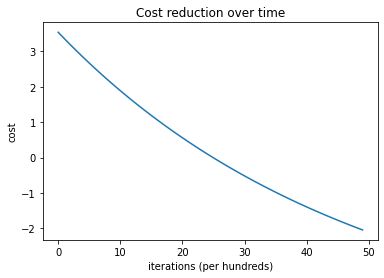

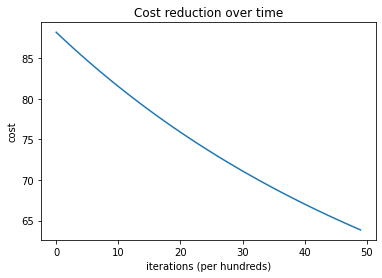

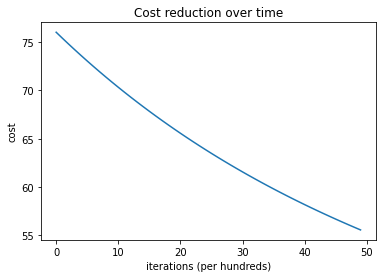

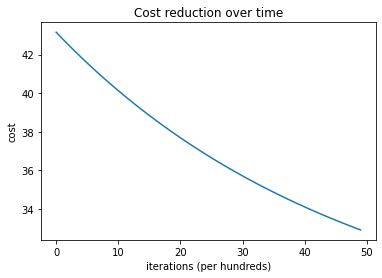

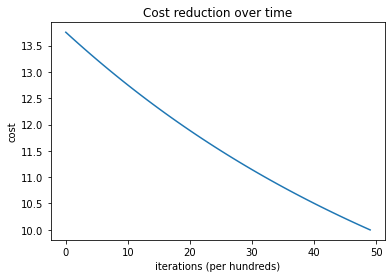

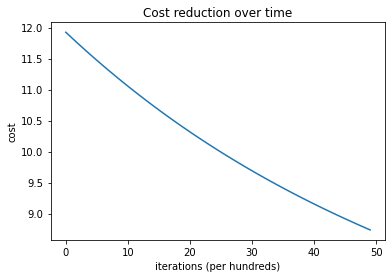

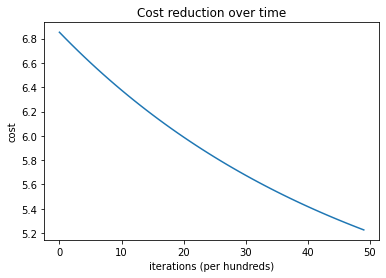

In [13]:
# optimizers
for b in [0.05, 0.25, 0.95]:
    accuracy(sigmoid_activation, b, 0.0001, 5000)
for b in [0.05, 0.25, 0.95]:
    accuracy(sigmoid_activation, b, 0.0001, 5000, opt=simple)
for b in [0.05, 0.25, 0.95]:
    accuracy(sigmoid_activation, b, 0.0001, 5000, opt=nesterov)
for b in [0.05, 0.25, 0.95]:
    accuracy(sigmoid_activation, b, 0.0001, 5000, opt=rms_prop)

In [11]:
def show():
    np.random.seed(10)
    num_observations = 10000
    x1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], num_observations)
    x2 = np.random.multivariate_normal([1, 4], [[1, 0.5], [0.5, 1]], num_observations)

    simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
    simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

    plt.figure(figsize=(10, 8))
    plt.scatter(simulated_separableish_features[:, 0],   simulated_separableish_features[:, 1], c=simulated_labels,    alpha=0.3,)

    plt.show()

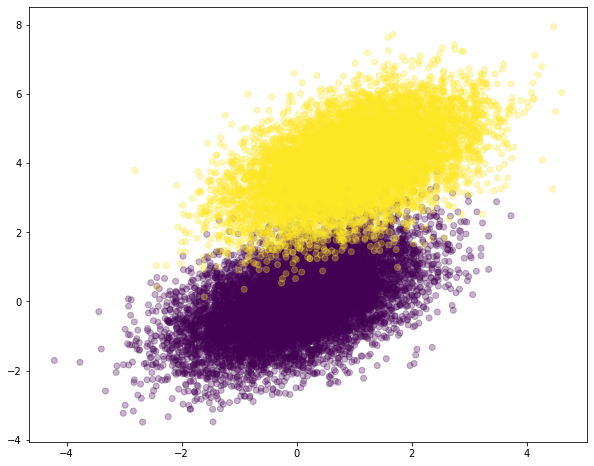

In [102]:
show()